        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Group Project - Fall 2022</h1>

You need to work as a team for this project. Your job is to develop a predictive model that can predict whether or not a movie is a <i>Drama</i>. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Drama.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Additional Note:</b> This note provides additional guideline for the project.

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Drama or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) DramaGenre. The value for the third column should be in a binary format. If the movie is drama the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Drama movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

Keep in mind that the above steps are only provide guidelines. There are more detail works in this project that should be identified by students. 

<b>Extra Credit</b> The group with the best prediction model is going to get extra points.

***Let's import all the required packages in the next module***

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

As the required packages were installed lets read the given csv files into the variables 

In [2]:
data_student = pd.read_csv('movie_story_student_file.csv')
data_evaluation = pd.read_csv('movie_story_evaluation_file.csv')
data_movies = pd.read_csv('movies.csv')

Let's check whether there are any null values in the data or not using sum() we can get the number of missing values in each column.

In [3]:
data_student.isnull().sum()

movie_id    0
story       0
dtype: int64

In [4]:
data_evaluation.isnull().sum()

movie_id    0
story       0
dtype: int64

In [5]:
data_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

As we can see there no null values in any of the data files so we can go ahead proceed further.

In [6]:
data_evaluation

,movie_id,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."
...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap..."
3494,131064,After living for years as a struggling artist ...
3495,131066,Ronal is a young barbarian with low self-estee...
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t..."


In [7]:
data_student

,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...
...,...,...
19995,56801,The iconic creatures from two of the scariest ...
19996,122337,When a bored-with-life English teacher meets a...
19997,187875,Herbert Blount is a crowdfunding contributor f...
19998,187873,REAL BOY is the coming-of-age story of Bennett...


In [8]:
data_movies

,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller
...,...,...,...
23493,209051,Jeff Garlin: Our Man in Chicago (2019),(no genres listed)
23494,209085,The Mistletoe Secret (2019),Romance
23495,209133,The Riot and the Dance (2018),(no genres listed)
23496,209157,We (2018),Drama


As we look at the movies dataset we can see in the genres column we have some rows with values no genres listed and no overview found we can drop them.

In [9]:
data_movies = data_movies.drop(data_movies[(data_movies.genres == "(no genres listed)")].index) 
data_movies
data_student = data_student.drop(data_student[(data_student.story == "No overview found.")].index)
data_student

,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...
...,...,...
19995,56801,The iconic creatures from two of the scariest ...
19996,122337,When a bored-with-life English teacher meets a...
19997,187875,Herbert Blount is a crowdfunding contributor f...
19998,187873,REAL BOY is the coming-of-age story of Bennett...


In [10]:
movies= pd.merge(data_student, data_movies, how='inner', left_on = 'movie_id', right_on = 'movieId') 
#as there are two columns with movieId we can drop either one of them and the title is not required for the process 
#we can drop that column as well
movies=movies.drop(['movieId','title'],axis=1)
movies

,movie_id,story,genres
0,131072,A girl who always tends to fall in love with t...,Comedy
1,196609,"Bigfoot has come to the town of Ellwood City, ...",Comedy|Horror
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Documentary
3,196611,"In her first special since 2003, Ellen revisit...",Comedy
4,196613,Mike and Sulley are back at Monsters Universit...,Animation|Children|Comedy|Fantasy
...,...,...,...
18865,56801,The iconic creatures from two of the scariest ...,Action|Horror|Sci-Fi
18866,122337,When a bored-with-life English teacher meets a...,Drama|Romance
18867,187875,Herbert Blount is a crowdfunding contributor f...,Horror
18868,187873,REAL BOY is the coming-of-age story of Bennett...,Documentary


Here we have used dummies for the genre variable

In [11]:
movies['DramaGenre'] = movies['genres'].str.get_dummies()['Drama']
movies

,movie_id,story,genres,DramaGenre
0,131072,A girl who always tends to fall in love with t...,Comedy,0
1,196609,"Bigfoot has come to the town of Ellwood City, ...",Comedy|Horror,0
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",Documentary,0
3,196611,"In her first special since 2003, Ellen revisit...",Comedy,0
4,196613,Mike and Sulley are back at Monsters Universit...,Animation|Children|Comedy|Fantasy,0
...,...,...,...,...
18865,56801,The iconic creatures from two of the scariest ...,Action|Horror|Sci-Fi,0
18866,122337,When a bored-with-life English teacher meets a...,Drama|Romance,1
18867,187875,Herbert Blount is a crowdfunding contributor f...,Horror,0
18868,187873,REAL BOY is the coming-of-age story of Bennett...,Documentary,0


Dropping the genre column

In [12]:
main_dataset = movies.drop(columns=['genres'], axis=1)
main_dataset


,movie_id,story,DramaGenre
0,131072,A girl who always tends to fall in love with t...,0
1,196609,"Bigfoot has come to the town of Ellwood City, ...",0
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",0
3,196611,"In her first special since 2003, Ellen revisit...",0
4,196613,Mike and Sulley are back at Monsters Universit...,0
...,...,...,...
18865,56801,The iconic creatures from two of the scariest ...,0
18866,122337,When a bored-with-life English teacher meets a...,1
18867,187875,Herbert Blount is a crowdfunding contributor f...,0
18868,187873,REAL BOY is the coming-of-age story of Bennett...,0


In [13]:
main_dataset['DramaGenre'].value_counts()

0    10467
1     8403
Name: DramaGenre, dtype: int64

## DATA CLEANING and DATA VISUALIZATION

The data contains lot of symbols or non-alphabets and whitespaces along with unnecessary words using regular expressions and stopwords we remove them from the data before using to train to improvise the model.

In [14]:
updated_story=main_dataset['story']
temp=[]
for i in updated_story:
    i = re.sub(r"http\S+", "", i)
    i = re.sub("[^a-zA-Z]"," ",i) 
    i=i.lower()
    temp.append(i)
main_dataset['story']=temp

### Removing stopwords

In [82]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

j=[]
n_s=[]
for i in main_dataset['story']:
    n_s = [k for k in i.split() if not k in stop_words]
    j.append(' '.join(n_s))
main_dataset['story']=j

### STEMMING:

It is the main approach which allow us to improve the tokenization. ***Stemming*** allows you to eliminate the **plural forms** and other forms of same word. It does it by considering the root word and eliminating the words that are similar to root word. example: <b>"happy"</b>, <b>"happier"</b>, <b>"happiness"</b>, and <b>"happies"</b> will be considered as one word 

In [104]:
#from nltk.tokenize import word_tokenize
#stemmer = PorterStemmer()
#t=[]
#for text in main_dataset['story']:
    #tokens = word_tokenize(text)
    #t.append(" ".join([stemmer.stem(token) for token in tokens]))
#main_dataset['story']=t

We tried **stemming** to train the models but the accuracy and results are better when we did Lemmatization so we skipped the stemming and opted with ***Lemmatization.***

### Lemmatization
Lemmatization is an approach to normalize textual documents that can take the part-of-speach into account.

In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

 
L = WordNetLemmatizer()
t2=[]
for j in main_dataset['story']:
    t = word_tokenize(j)
    t2.append(" ".join([L.lemmatize(i, pos="v") for i in t]))
main_dataset['story']=t2

In [18]:
main_dataset

,movie_id,story,DramaGenre
0,131072,girl always tend fall love wrong guy meet one ...,0
1,196609,bigfoot come town ellwood city pa cause big pr...,0
2,131074,altitude feet alaska mount st elias destinatio...,0
3,196611,first special since ellen revisit road stardom...,0
4,196613,mike sulley back monsters university fun fill ...,0
...,...,...,...
18865,56801,iconic creatures two scariest film franchise m...,0
18866,122337,bore life english teacher meet west coast swin...,1
18867,187875,herbert blount crowdfunding contributor new ad...,0
18868,187873,real boy come age story bennett wallace transg...,0


Top **15** tokens visualization using FreqDistVisualizer

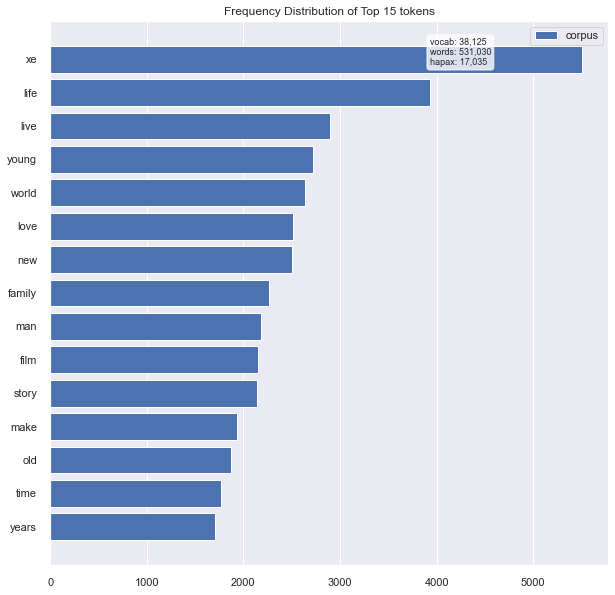

<AxesSubplot:title={'center':'Frequency Distribution of Top 15 tokens'}>

In [85]:
from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
vect = CountVectorizer(stop_words='english')
X = vect.fit_transform(main_dataset.story)

# Get all features (tokens)
features = vect.get_feature_names_out()

# Use yellowbrick package for visualization of top 15 tokens
fig, ax = plt.subplots(figsize=(10,10))
visualizer = FreqDistVisualizer(features=features, n=15)
visualizer.fit(X)
visualizer.poof()



#### Percentage of drama or not in the data

<AxesSubplot:ylabel='DramaGenre'>

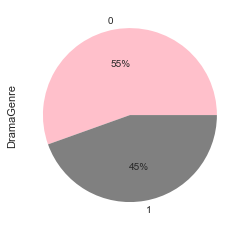

In [20]:
%matplotlib inline
main_dataset.DramaGenre.value_counts().plot(kind = 'pie',autopct='%1.0f%%',colors=['pink','grey'])

### Visualizing the Wordcloud

In [27]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
movie_mask = np.array(Image.open("wordcloud.jpeg").convert('L'))
#movie_mask=movie_mask/255.0
movie_mask

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

In [28]:
def transform_format(val):
    if val == 0:
        return val
    else:
        return 255
    

In [29]:
movie_mask.shape

(213, 236)

In [30]:
transformed_movie_mask = np.ndarray((movie_mask.shape[0],
                                    movie_mask.shape[1]), np.int32)

for i in range(len(movie_mask)):
    transformed_movie_mask[i] = list(map(transform_format, movie_mask[i]))

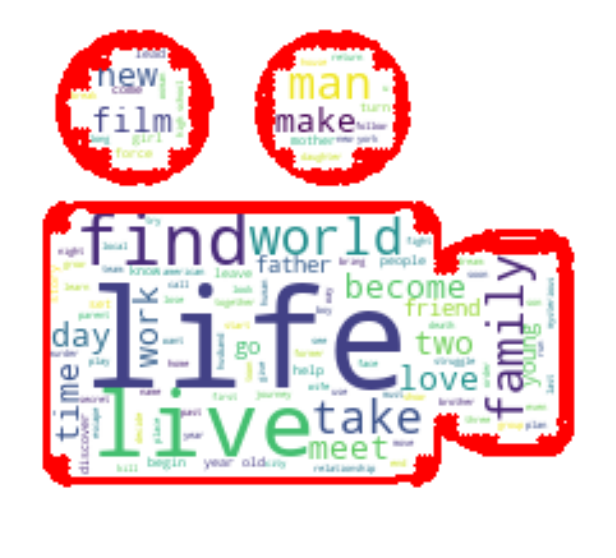

In [44]:
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS
text = " ".join(review for review in main_dataset.story)
stopwords = set(STOPWORDS)
stopwords.update(['X','Xe','one','xc','xa'])
wc = WordCloud(background_color="white", max_words=1000, 
               mask=transformed_movie_mask,
               stopwords=stopwords, contour_width=3, 
               contour_color='red')
wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

### CountVectorizer
It is used to reduce the sime of Document Term Frequency Matrix.It is used to transform a given text into a vector on the basis of the frequency of each word that occurs in the entire text.

***max_features:*** Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus

***max_df:*** When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold.

In [270]:
#vect = CountVectorizer(ngram_range=(1,3),stop_words="english")
#X=vect.fit_transform(main_dataset['story'])

The TF-IDF works better with the dataset and we finalize the TF-IDF vectorizer instead of countVectorizer.

### TF-IDF vectorizer

It assign weights to different terms is using term frequency–inverse document frequency method. The **vectorizer** takes in the text data and does both the bag-of-words feature extraction and the TF–IDF transformation


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
s = main_dataset.story
vect = TfidfVectorizer(ngram_range=(1,3), stop_words="english")
X = vect.fit_transform(s)

In [33]:
y=main_dataset.DramaGenre

Let's split the dataset into train and test sets. In this we are splitting the training set to 70 and test set to 30% using <u> train_test_split</u>

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Algorithms used to train the data
   1. **KNN**
   2. **Logistic Regression**
   3. **Random Forest**
   4. **Neural Network with Multiple layer**
   5. **XGBoost**
   6. **Naive Bayes**
   7. **SGD Classifier**

## KNN 

It is known as the ***lazy classifiers.*** It is a instance-based learning. we classify the data by looking at the k-closest examples in training data we use distance metric to do the classification then, given the K-similar examples, the most popular target (majority voting) is chosen as the classification label.

The two important parameter for this algorithm are:
   1. **K** also known as neighborhood cardinaity.
   2. **measure to evaluate the similarity** (defaults metric is Euclidean distance)

In [35]:
from sklearn.model_selection import GridSearchCV

model1 = KNeighborsClassifier()

param = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model1, param, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 5}
Best Cross Vlidation Score: 0.6211446740858506


In [36]:
model2 = KNeighborsClassifier(n_neighbors = 5) 
model2.fit(X_train, y_train)
y_test_hat2 = model2.predict(X_test)

In [37]:
print("Accuracy of the model:")
print(accuracy_score(y_test, y_test_hat2, normalize = True) * 100)

Accuracy of the model:
62.37413884472708


In [38]:
from sklearn.metrics import classification_report
print("classification report for 5 neighbors")
print(classification_report(y_test,y_test_hat2))

classification report for 5 neighbors
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      3112
           1       0.59      0.53      0.56      2549

    accuracy                           0.62      5661
   macro avg       0.62      0.62      0.62      5661
weighted avg       0.62      0.62      0.62      5661



[[2174  938]
 [1192 1357]]


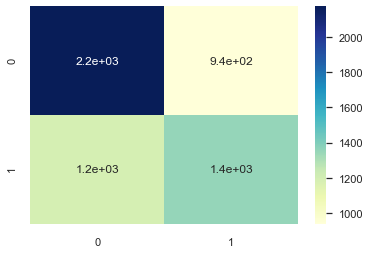

In [39]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
CM_KNN=confusion_matrix(y_test,y_test_hat2)
print(CM_KNN)
sns.heatmap(CM_KNN,annot=True,cmap='YlGnBu')
plt.show()

## Logistic Regression

It is used to model data and to explain the relationship between one binary dependent variable(DramaGenre) and one or more quantities.



In [40]:
model3 = LogisticRegression(C=1.5,max_iter=400)
model3.fit(X_train, y_train)
y_test_hat3 = model3.predict(X_test)

In [41]:
print("Accuracy of the model:")
print(accuracy_score(y_test, y_test_hat3, normalize = True) * 100)

Accuracy of the model:
67.77954425013249


In [42]:
print("classification report for Logistic Regressions")
print(classification_report(y_test,y_test_hat3))

classification report for Logistic Regressions
              precision    recall  f1-score   support

           0       0.66      0.84      0.74      3112
           1       0.71      0.48      0.57      2549

    accuracy                           0.68      5661
   macro avg       0.69      0.66      0.66      5661
weighted avg       0.69      0.68      0.66      5661



[[2731  381]
 [1537 1012]]


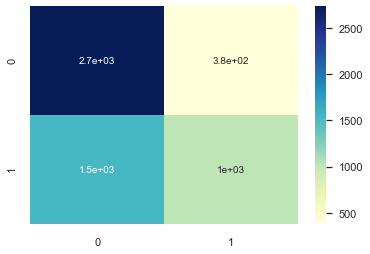

In [266]:
CM_LR=confusion_matrix(y_test,y_test_hat3)
print(CM_LR)
sns.heatmap(CM_LR,annot=True,cmap='YlGnBu')
plt.show()

### RANDOM FOREST


In [43]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)

y_test_hat4 = model4.predict(X_test)
acc = accuracy_score(y_test,y_test_hat4, normalize = True) * 100
print("Accuracy of the model: ", acc)

Accuracy of the model:  66.31337219572514


In [45]:
print("classification report for Random Forest")
print(classification_report(y_test,y_test_hat4))

classification report for Random Forest
              precision    recall  f1-score   support

           0       0.65      0.84      0.73      3112
           1       0.70      0.44      0.54      2549

    accuracy                           0.66      5661
   macro avg       0.67      0.64      0.64      5661
weighted avg       0.67      0.66      0.65      5661



[[2625  487]
 [1337 1212]]


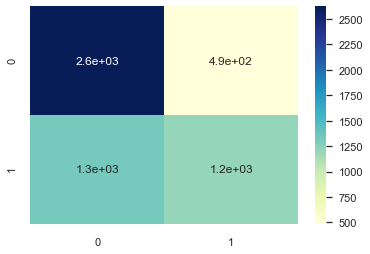

In [46]:
CM_RF=confusion_matrix(y_test,y_test_hat3)
print(CM_RF)
sns.heatmap(CM_RF,annot=True,cmap='YlGnBu')
plt.show()

## Neural networks
It can be viewed as generalization of linear models that perform multiple stages of processing to make a decision. The main power of neural networks is in using large datasets.

In this algorithm we use the MLP classifier with relu activation function.


In [47]:
from sklearn.neural_network import MLPClassifier

model5 = MLPClassifier(random_state=0,hidden_layer_sizes=[10,5],max_iter=200,activation='relu')
model5.fit(X_train,y_train)
y_test_hat5 = model5.predict(X_test)

In [50]:
Accuracy = accuracy_score(y_test,y_test_hat5, normalize = True) * 100
print("Accuracy of the model: ", Accuracy)
print(classification_report(y_test,y_test_hat5))

Accuracy of the model:  69.13972796325739
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      3112
           1       0.68      0.60      0.64      2549

    accuracy                           0.69      5661
   macro avg       0.69      0.68      0.68      5661
weighted avg       0.69      0.69      0.69      5661



[[2378  734]
 [1013 1536]]


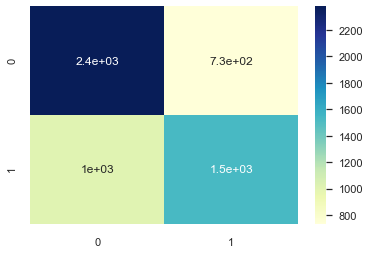

In [51]:
CM_NN=confusion_matrix(y_test,y_test_hat5)
print(CM_NN)
sns.heatmap(CM_NN,annot=True,cmap='YlGnBu')
plt.show()


### XGBoost

In [46]:
#pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 9.9 MB/s eta 0:00:00



In [52]:
import xgboost as xgb
model6 = xgb.XGBClassifier()
model6.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [53]:
y_test_hat6 = model6.predict(X_test)
Accuracy = accuracy_score(y_test,y_test_hat6, normalize = True) * 100
print("Accuracy of the model: ", Accuracy)
print(classification_report(y_test,y_test_hat6))

Accuracy of the model:  67.83253842077372
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      3112
           1       0.66      0.58      0.62      2549

    accuracy                           0.68      5661
   macro avg       0.68      0.67      0.67      5661
weighted avg       0.68      0.68      0.68      5661



[[2364  748]
 [1073 1476]]


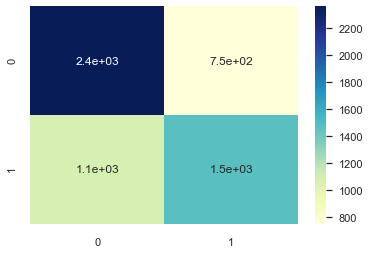

In [54]:
CM_XG=confusion_matrix(y_test,y_test_hat6)
print(CM_XG)
sns.heatmap(CM_XG,annot=True,cmap='YlGnBu')
plt.show()


## NAIVE BAYES
It is a fast and simple **classification** algorithm suitable for **high-dimensional datasets**. In Bayesian classification, we’re interested in finding the probability of a label given some observed features. ***Naive Bayes models*** are usually consider as baseline model for a classification problem.

<li><b>Multinomial Naive Bayes</b> - The main assumption is that features are generated from a simple multinomial distribution.multinomial naive Bayes is often used is in <b>text classification,</b> where the features are related to word counts or frequencies within the documents to be classified.</li>

In [55]:
model7= MultinomialNB()
model7.fit(X_train,y_train)
y_test_hat7 = model7.predict(X_test)

In [56]:
Accuracy = accuracy_score(y_test,y_test_hat7, normalize = True) * 100
print("Accuracy of the model: ", Accuracy)
print(classification_report(y_test,y_test_hat7))

Accuracy of the model:  60.16604840134252
              precision    recall  f1-score   support

           0       0.58      0.98      0.73      3112
           1       0.84      0.14      0.24      2549

    accuracy                           0.60      5661
   macro avg       0.71      0.56      0.49      5661
weighted avg       0.70      0.60      0.51      5661



[[3041   71]
 [2184  365]]


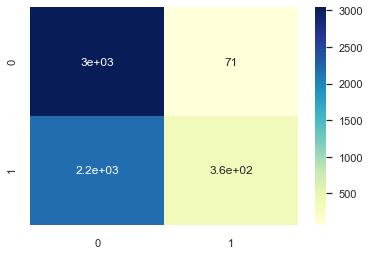

In [57]:
CM_MN=confusion_matrix(y_test,y_test_hat7)
print(CM_MN)
sns.heatmap(CM_MN,annot=True,cmap='YlGnBu')
plt.show()

### SGDClassifier  (Stochastic Gradient Descent)

In [58]:
from sklearn.linear_model import SGDClassifier
model8 = SGDClassifier()
model8.fit(X_train, y_train)
y_test_hat8 = model8.predict(X_test)
print("Accuracy for SGDClassifier: ",accuracy_score(y_test,y_test_hat8) * 100)

Accuracy for SGDClassifier:  68.23882706235648


In [275]:
print("classification report for SGD")
print(classification_report(y_test,y_test_hat8))

classification report for SGD
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      3112
           1       0.70      0.51      0.59      2549

    accuracy                           0.68      5661
   macro avg       0.69      0.67      0.67      5661
weighted avg       0.69      0.68      0.67      5661



[[2560  552]
 [1242 1307]]


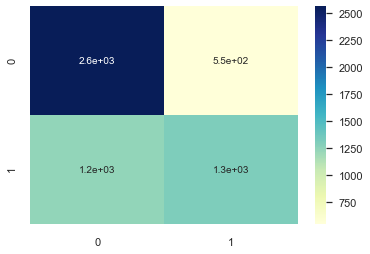

In [276]:
CM_SG=confusion_matrix(y_test,y_test_hat8)
print(CM_SG)
sns.heatmap(CM_SG,annot=True,cmap='YlGnBu')
plt.show()

<AxesSubplot:>

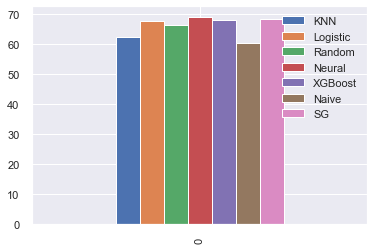

In [59]:
df = pd.DataFrame({
    'KNN': [62.37],'Logistic':[67.77],'Random':[66.31],'Neural':[69.13],'XGBoost':[67.83],'Naive':[60.16],'SG':[68.23]})
df.plot(kind='bar')

Based on the accuracy we select the ***Neural Network*** as the best model and train the model using full dataset

In [60]:
selected_model = MLPClassifier(random_state=0,hidden_layer_sizes=[10,5],max_iter=200,activation='relu')
selected_model.fit(X,y)
y_test_hat = selected_model.predict(X)



In [61]:
Accuracy = accuracy_score(y,y_test_hat, normalize = True) * 100
print("Accuracy of the Best model: ", Accuracy)
print(classification_report(y,y_test_hat))

Accuracy of the Best model:  99.97880233174351
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10467
           1       1.00      1.00      1.00      8403

    accuracy                           1.00     18870
   macro avg       1.00      1.00      1.00     18870
weighted avg       1.00      1.00      1.00     18870



Using the same preprocessing steps as the previous dataset we prepare the data for evaluating/

In [62]:
data_evaluation
data= pd.merge(data_evaluation, data_movies, how='inner', left_on = 'movie_id', right_on = 'movieId') 
#as there are two columns with movieId we can drop either one of them and the title is not required for the process 
#we can drop that column as well
data=data.drop(['movieId','title'],axis=1)
data

,movie_id,story,genres
0,122349,Growing up in the Mission district of San Fran...,Drama
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance
...,...,...,...
3297,131062,"In the middle of nowhere, 20 years after an ap...",Drama|Fantasy|Sci-Fi
3298,131064,After living for years as a struggling artist ...,Comedy
3299,131066,Ronal is a young barbarian with low self-estee...,Adventure|Animation|Fantasy
3300,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",Comedy


In [63]:
data = data.drop(data[(data.genres == "(no genres listed)")].index) 
data
data = data.drop(data[(data.story == "No overview found.")].index)
data

,movie_id,story,genres
0,122349,Growing up in the Mission district of San Fran...,Drama
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance
...,...,...,...
3297,131062,"In the middle of nowhere, 20 years after an ap...",Drama|Fantasy|Sci-Fi
3298,131064,After living for years as a struggling artist ...,Comedy
3299,131066,Ronal is a young barbarian with low self-estee...,Adventure|Animation|Fantasy
3300,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",Comedy


In [64]:
data['DramaGenre'] = data['genres'].str.get_dummies()['Drama']
data

,movie_id,story,genres,DramaGenre
0,122349,Growing up in the Mission district of San Fran...,Drama,1
1,122351,A soldier returns home from the Iraq war only ...,Horror|Thriller,0
2,122361,Marco the Monkey works as a beach officer. But...,Animation|Children|Comedy,0
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",Action|Romance,0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",Action|Drama|Romance,1
...,...,...,...,...
3297,131062,"In the middle of nowhere, 20 years after an ap...",Drama|Fantasy|Sci-Fi,1
3298,131064,After living for years as a struggling artist ...,Comedy,0
3299,131066,Ronal is a young barbarian with low self-estee...,Adventure|Animation|Fantasy,0
3300,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",Comedy,0


In [65]:
evaluation_dataset = data.drop(columns=['genres'], axis=1)
evaluation_dataset


,movie_id,story,DramaGenre
0,122349,Growing up in the Mission district of San Fran...,1
1,122351,A soldier returns home from the Iraq war only ...,0
2,122361,Marco the Monkey works as a beach officer. But...,0
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",1
...,...,...,...
3297,131062,"In the middle of nowhere, 20 years after an ap...",1
3298,131064,After living for years as a struggling artist ...,0
3299,131066,Ronal is a young barbarian with low self-estee...,0
3300,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",0


In [66]:
evaluation_dataset['DramaGenre'].value_counts()

0    1879
1    1423
Name: DramaGenre, dtype: int64

In [67]:
updated_story=evaluation_dataset['story']
temp=[]
for i in updated_story:
    i = re.sub(r"http\S+", "", i)
    i = re.sub("[^a-zA-Z]"," ",i) 
    i=i.lower()
    temp.append(i)
evaluation_dataset['story']=temp

In [68]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

j=[]
n_s=[]
for i in evaluation_dataset['story']:
    n_s = [k for k in i.split() if not k in stop_words]
    j.append(' '.join(n_s))
evaluation_dataset['story']=j

In [69]:
from nltk.stem import WordNetLemmatizer

 
L = WordNetLemmatizer()
t2=[]
for j in evaluation_dataset['story']:
    t = word_tokenize(j)
    t2.append(" ".join([L.lemmatize(i, pos="v") for i in t]))
evaluation_dataset['story']=t2

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
S= evaluation_dataset.story
X2 = vect.transform(S)


In [71]:
y2=evaluation_dataset.DramaGenre

In [72]:
#X2.shape

(3302, 917325)

In [73]:
#X.shape

(18870, 917325)

In [74]:
selected_model.fit(X,y)
y_hat=selected_model.predict(X2)

In [75]:
Accuracy = accuracy_score(y2,y_hat, normalize = True) * 100
print("Accuracy of the Best model: ", Accuracy)
print(classification_report(y2,y_hat))

Accuracy of the Best model:  72.62265293761357
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1879
           1       0.67      0.73      0.70      1423

    accuracy                           0.73      3302
   macro avg       0.72      0.73      0.72      3302
weighted avg       0.73      0.73      0.73      3302



In [77]:
print("Final accuracy for best model : {:.4f}".format(accuracy_score(y2,y_hat) * 100))

print("F1 Score for the best model : {:.4f}".format(f1_score(y2,y_hat) * 100))
print("Precision Score for the best model : {:.4f}".format(precision_score(y2,y_hat) * 100))
print("Recall Score for the best model : {:.4f}".format(recall_score(y2,y_hat) * 100))

Final accuracy for best model : 72.6227
F1 Score for the best model : 69.5828
Precision Score for the best model : 66.7527
Recall Score for the best model : 72.6634


### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final submited file should be very well structured and should have a consistent flow of analysis.</li>
    <li>You may want to use an additional word document to report the result of your analysis</li>
</ul>

#### Due Date: Dec 2 2022 at 11:59 AM

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">100%</b></td>
    </tr>
</table>